In [25]:
#https://www.datacamp.com/tutorial/xgboost-in-python
#https://machinelearningmastery.com/avoid-overfitting-by-early-stopping-with-xgboost-in-python/
#https://machinelearningmastery.com/tune-number-size-decision-trees-xgboost-python/ for n_estimators
#eval_metric: rmse for regression, and logloss for classification (assigned by XGBoost by default based on the predictor)

#Objective candidate: survival:aft
#Objective candidate: binary:hinge
#Objective candidate: multi:softmax
#Objective candidate: multi:softprob
#Objective candidate: rank:pairwise
#Objective candidate: rank:ndcg
#Objective candidate: rank:map
#Objective candidate: reg:squarederror
#Objective candidate: reg:squaredlogerror
#Objective candidate: reg:logistic
#Objective candidate: binary:logistic
#Objective candidate: binary:logitraw
#Objective candidate: reg:linear
#Objective candidate: reg:pseudohubererror
#Objective candidate: count:poisson
#Objective candidate: survival:cox
#Objective candidate: reg:gamma
#Objective candidate: reg:tweedie
#Objective candidate: reg:absoluteerror

In [26]:
import numpy as np
import pandas as pd
import xgboost as xgb
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [27]:
df = pd.read_csv("diamonds.csv", sep=",", header=0)

In [48]:
df.head(20)
#Notice that cut, color, and clairty are object types. We can see with the eye that they are categorical
#So we will convert them to "categorty" data types later on
#We can check it with df.dtypes as the below

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [29]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [30]:
df.shape #rows, columns

(53940, 10)

In [31]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [32]:
df.describe(exclude=np.number)
#this excludes all numeric columns

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


<Axes: >

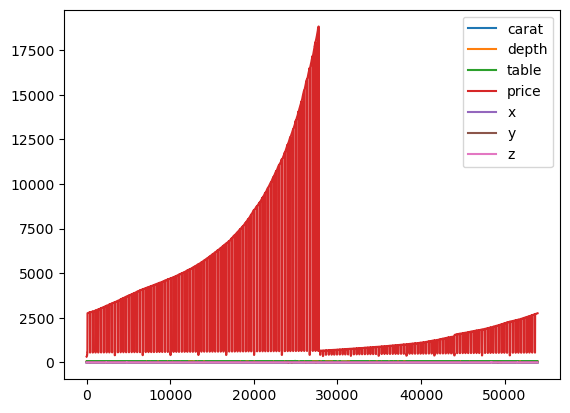

In [33]:
df.plot()

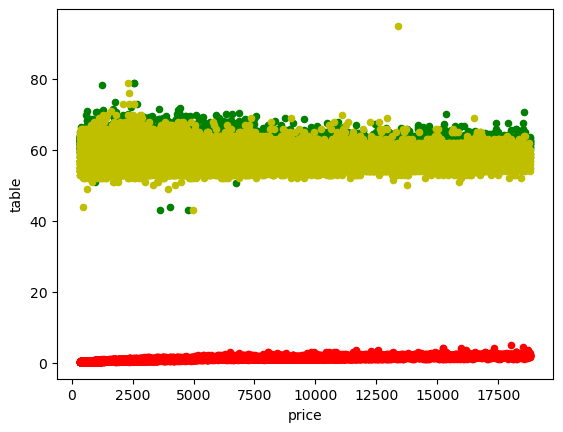

In [34]:
ax1 = df.plot(kind='scatter', x='price', y='carat', color='r')    
ax2 = df.plot(kind='scatter', x='price', y='depth', color='g', ax=ax1) 
ax2 = df.plot(kind='scatter', x='price', y='table', color='y', ax=ax1) 
#print(ax1 == ax2)  # True

In [35]:
X, y = df.drop('price', axis=1), df[['price']] #drop price from X, assign price to y

In [36]:
cats = X.select_dtypes(exclude=np.number).columns.tolist()
cats #['cut', 'color', 'clarity']

['cut', 'color', 'clarity']

In [37]:
for col in cats:
   X[col] = X[col].astype('category')
X.dtypes #not they are category data types

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
x           float64
y           float64
z           float64
dtype: object

# Train Test Split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.33)

In [39]:
dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True) #train dataset
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True) #test dataset

# Training

In [40]:
#Now, we set another parameter called num_boost_round, which stands for number of boosting rounds. 
#Internally, XGBoost minimizes the loss function RMSE in small incremental rounds
params = {"objective": "reg:squarederror", 
          "tree_method": "hist", #gpu_hist
          "max_depth": 6, #default 6
          "eta": 0.2, #alias is learning_rate. Default 0.3. 0 to 1
          "colsample_bytree": 0.3, 
          "alpha": 10, 
          "lambda": 1, 
          #"n_estimators": 100
         } 
n = 100 #The ideal number of rounds is found through hyperparameter tuning
model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
)

#max_depth: Maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit

#eta alias is learning rate. Step size shrinkage used in update to prevents overfitting. 
#After each boosting step, we can directly get the weights of new features, and eta shrinks the feature weights to make the boosting 
#process more conservative

#alpha: L1 regularization term on weights. Increasing this value will make model more conservative. Values are 0 to infinity

#lambda L2 regularization term on weights. Increasing this value will make model more conservative. Default 1. Values are 0 to infinity

# Predicting

In [41]:
#This step of the process is called model evaluation (or inference). Once you generate predictions with predict, 
#you pass them inside mean_squared_error function of Sklearn to compare against y_test:
preds = model.predict(dtest_reg)

In [43]:
rmse = mean_squared_error(y_test, preds, squared=False) #use this one
print(f"RMSE of the base model: {rmse:.3f}") #the lower the value the better

RMSE of the base model: 642.513


In [44]:
#To get the accuracy of the model. But we cannot really use a % because it is not a class prediction
#but I am leaving this code here for future reference
predictions = [round(value) for value in preds]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 0.19%


In [45]:
model.get_score(importance_type='gain')

{'carat': 514899872.0,
 'cut': 17794148.0,
 'color': 107500512.0,
 'clarity': 209148592.0,
 'depth': 5224058.0,
 'table': 7148252.5,
 'x': 1346932992.0,
 'y': 304049056.0,
 'z': 184995600.0}

# Validation sets to make training more accurate and to see model output

In [46]:
params = {"objective": "reg:squarederror", "tree_method": "hist"}
n = 100

#Next, we create a list of two tuples that each contain two elements. 
#The first element is the array for the model to evaluate, and the second is the array’s name.
evals = [(dtrain_reg, "train"), (dtest_reg, "validation")]

#By passing evals, we can see the model performance after each round
model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
   evals=evals,
   verbose_eval=10 # Every ten rounds
)

[0]	train-rmse:3996.59507	validation-rmse:3919.98264
[10]	train-rmse:555.17578	validation-rmse:586.20815
[20]	train-rmse:490.16594	validation-rmse:550.67191
[30]	train-rmse:462.41702	validation-rmse:543.92352
[40]	train-rmse:444.30952	validation-rmse:541.00993
[50]	train-rmse:430.15756	validation-rmse:540.73603
[60]	train-rmse:415.92274	validation-rmse:539.50987
[70]	train-rmse:403.80283	validation-rmse:540.31181
[80]	train-rmse:391.51499	validation-rmse:539.73747
[90]	train-rmse:380.23018	validation-rmse:539.48709
[99]	train-rmse:372.74007	validation-rmse:539.59367


# Feature importance

In [16]:
model.get_score(importance_type='gain')

{'carat': 713962368.0,
 'cut': 5531280.0,
 'color': 41403012.0,
 'clarity': 103800296.0,
 'depth': 3436376.5,
 'table': 2808165.75,
 'x': 4663711.0,
 'y': 918509632.0,
 'z': 22283666.0}

# What about early stopping?

In [47]:
#When validation loss starts increaing, we kinda want to stop
#XGBoost starts to overfit and memorize the dataset. This, in turn, 
#leads to validation performance drop because the model is memorizing instead of generalizing

params = {"objective": "reg:squarederror", "tree_method": "hist"}
n = 5000

evals = [(dtest_reg, "validation"), (dtrain_reg, "train")]
model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
   evals=evals,
   verbose_eval=100,
   early_stopping_rounds=50
)

[0]	validation-rmse:3919.98264	train-rmse:3996.59507
[100]	validation-rmse:539.56878	train-rmse:372.68101
[200]	validation-rmse:548.84965	train-rmse:297.91997
[300]	validation-rmse:557.67300	train-rmse:250.33257
[400]	validation-rmse:565.14598	train-rmse:213.85593
[500]	validation-rmse:568.83574	train-rmse:187.82098
[600]	validation-rmse:571.14874	train-rmse:165.11441
[700]	validation-rmse:573.37402	train-rmse:147.91758
[800]	validation-rmse:573.93286	train-rmse:133.79750
[900]	validation-rmse:574.86780	train-rmse:122.41110
[1000]	validation-rmse:575.99056	train-rmse:113.58255
[1100]	validation-rmse:577.09420	train-rmse:103.36037
[1200]	validation-rmse:577.77186	train-rmse:94.85626
[1300]	validation-rmse:578.45115	train-rmse:88.28392
[1400]	validation-rmse:578.86920	train-rmse:82.06916
[1500]	validation-rmse:579.34295	train-rmse:76.78694
[1600]	validation-rmse:579.88471	train-rmse:71.56056
[1700]	validation-rmse:580.41998	train-rmse:66.79429
[1800]	validation-rmse:580.80225	train-rmse:

# XGBoost Cross-Validation

In [106]:
#Since we try to find the best value of a hyperparameter by comparing the validation performance of the model on the test set, 
#we will end up with a model that is configured to perform well only on that particular test set. Instead, we want a model that performs 
#well across the board — on any test set we throw at it.

#A possible workaround is splitting the data into three sets. The model trains on the first set, the second set is used for 
#evaluation and hyperparameter tuning, and the third is the final one we test the model before production.

#But when data is limited, splitting data into three sets will make the training set sparse, which hurts model performance.

#The solution to all these problems is cross-validation. In cross-validation, we still have two sets: training and testing.

#While the test set waits in the corner, we split the training into 3, 5, 7, or k splits or folds. Then, we train the model k times. 
#Each time, we use k-1 parts for training and the final kth part for validation. This process is called k-fold cross-validation:

params = {"objective": "reg:squarederror", "tree_method": "hist"}
n = 5000

results = xgb.cv(
   params, 
   dtrain_reg,
   num_boost_round=n,
   nfold=5,
   early_stopping_rounds=20
)
results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,3985.648654,10.343596,3986.913623,41.642778
1,2848.365726,8.014086,2851.020437,28.028733
2,2063.401458,4.637773,2068.629977,19.969459
3,1521.493751,3.874078,1530.496272,13.592330
4,1156.827103,2.991735,1170.413316,11.695597


In [108]:
best_rmse = results['test-rmse-mean'].min()
best_rmse

#Note that this method of cross-validation is used to see the true performance of the model. 
#Once satisfied with its score, you must retrain it on the full data before deployment.

550.7196748119261